In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-88.84309950313909 168.34947941626484
22.496164618566013 120.66104538322878
-38.04107365735491 -151.62708718250406
-7.114300165699575 25.79543664372622
-37.81597079493657 62.38219000321661
-71.17847512490218 143.88106927940498
85.28846680386857 -15.876141701943027
37.395690484665465 98.98801261588
-2.6202576665520496 -163.87975153603003
0.8217848343980592 21.11570855403508
-14.694240628969169 120.0889209756271
-16.691966218989037 -113.7347664069671
5.698655245395997 -57.97898597750293
-13.931813470691907 -48.333111248651306
12.89552798557601 -123.17421639225458
-41.62223307020161 23.343436554846278
-69.3272106387874 79.74673272117013
-65.74077437853587 -156.25495171013176
43.03023952182491 -37.950939203352476
-42.91446591914267 143.34189497124862
45.947992374977275 -89.92132304888072
-24.25645325800349 154.2900782464186
21.421065813130852 6.7558806498887805
22.777437377472992 -164.49029596415465
23.04225527795319 -115.44084996054467
44.01792189329666 -173.97520103398963
50.451943908573

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 700 == 0 and i >= 700):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | chaochou
City not found. Skipping...
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | kabalo
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | zhangye
Processing Record 9 of Set 1 | samusu
City not found. Skipping...
Processing Record 10 of Set 1 | bongandanga
Processing Record 11 of Set 1 | broome
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | ituni
City not found. Skipping...
Processing Record 14 of Set 1 | niquelandia
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | plettenberg bay
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | burnie
Processing Record 20 of Set 1 | merri

Processing Record 187 of Set 1 | dicabisagan
Processing Record 188 of Set 1 | cairns
Processing Record 189 of Set 1 | mar del plata
Processing Record 190 of Set 1 | bitung
Processing Record 191 of Set 1 | new norfolk
Processing Record 192 of Set 1 | tuatapere
Processing Record 193 of Set 1 | porto novo
Processing Record 194 of Set 1 | santa helena
Processing Record 195 of Set 1 | tiksi
Processing Record 196 of Set 1 | aklavik
Processing Record 197 of Set 1 | diban
Processing Record 198 of Set 1 | abha
Processing Record 199 of Set 1 | olinda
Processing Record 200 of Set 1 | formosa do rio preto
Processing Record 201 of Set 1 | arraial do cabo
Processing Record 202 of Set 1 | ambovombe
Processing Record 203 of Set 1 | tutin
Processing Record 204 of Set 1 | jackson
Processing Record 205 of Set 1 | sorong
Processing Record 206 of Set 1 | ilulissat
Processing Record 207 of Set 1 | jalu
Processing Record 208 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 209 of Set 1 | 

Processing Record 368 of Set 1 | salalah
Processing Record 369 of Set 1 | plouzane
Processing Record 370 of Set 1 | phalaborwa
Processing Record 371 of Set 1 | grimshaw
Processing Record 372 of Set 1 | kiunga
Processing Record 373 of Set 1 | kalga
Processing Record 374 of Set 1 | jati
Processing Record 375 of Set 1 | kavaratti
Processing Record 376 of Set 1 | juba
Processing Record 377 of Set 1 | lavrentiya
Processing Record 378 of Set 1 | husavik
Processing Record 379 of Set 1 | doba
Processing Record 380 of Set 1 | parana
Processing Record 381 of Set 1 | cururupu
Processing Record 382 of Set 1 | codrington
Processing Record 383 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 384 of Set 1 | casablanca
Processing Record 385 of Set 1 | banjar
Processing Record 386 of Set 1 | evanton
Processing Record 387 of Set 1 | bagdarin
Processing Record 388 of Set 1 | gat
Processing Record 389 of Set 1 | presidencia roque saenz pena
Processing Record 390 of Set 1 | sambava
Pr

Processing Record 554 of Set 1 | ferme-neuve
Processing Record 555 of Set 1 | chaiyaphum
Processing Record 556 of Set 1 | palmas
Processing Record 557 of Set 1 | chapais
Processing Record 558 of Set 1 | domoni
Processing Record 559 of Set 1 | babanusah
City not found. Skipping...
Processing Record 560 of Set 1 | abu dhabi
Processing Record 561 of Set 1 | tabas
Processing Record 562 of Set 1 | piura
Processing Record 563 of Set 1 | bastia
Processing Record 564 of Set 1 | fomboni
Processing Record 565 of Set 1 | puerto narino
Processing Record 566 of Set 1 | helsinki
Processing Record 567 of Set 1 | marawi
Processing Record 568 of Set 1 | tilichiki
Processing Record 569 of Set 1 | nantucket
Processing Record 570 of Set 1 | atherton
Processing Record 571 of Set 1 | arman
Processing Record 572 of Set 1 | port hedland
Processing Record 573 of Set 1 | wukari
Processing Record 574 of Set 1 | kumo
Processing Record 575 of Set 1 | vaitape
Processing Record 576 of Set 1 | souillac
Processing Rec

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [51]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,33.80,87,27,4.72,NZ,2022-07-24 18:00:10
1,Mataura,-46.1927,168.8643,33.48,98,14,2.51,NZ,2022-07-24 17:55:18
2,Kabalo,-6.0500,26.9167,83.19,33,19,4.50,CD,2022-07-24 18:00:11
3,Saint-Philippe,-21.3585,55.7679,69.22,81,60,11.48,RE,2022-07-24 17:57:29
4,Hobart,-42.8794,147.3294,45.27,93,63,5.75,AU,2022-07-24 17:55:03
5,Zhangye,38.9342,100.4517,77.94,28,1,4.81,CN,2022-07-24 17:56:44
6,Bongandanga,1.5000,21.0500,78.12,69,48,1.95,CD,2022-07-24 18:00:12
7,Broome,42.2506,-75.8330,88.16,66,60,8.01,US,2022-07-24 17:55:37
8,Rikitea,-23.1203,-134.9692,74.89,79,80,14.27,PF,2022-07-24 17:55:16
9,Niquelandia,-14.4739,-48.4597,89.87,20,8,8.32,BR,2022-07-24 18:00:13


In [53]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [60]:
new_column_order = ['City','Country','Date', 'Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-07-24 18:00:10,-46.6000,168.3333,33.80,87,27,4.72
1,Mataura,NZ,2022-07-24 17:55:18,-46.1927,168.8643,33.48,98,14,2.51
2,Kabalo,CD,2022-07-24 18:00:11,-6.0500,26.9167,83.19,33,19,4.50
3,Saint-Philippe,RE,2022-07-24 17:57:29,-21.3585,55.7679,69.22,81,60,11.48
4,Hobart,AU,2022-07-24 17:55:03,-42.8794,147.3294,45.27,93,63,5.75
5,Zhangye,CN,2022-07-24 17:56:44,38.9342,100.4517,77.94,28,1,4.81
6,Bongandanga,CD,2022-07-24 18:00:12,1.5000,21.0500,78.12,69,48,1.95
7,Broome,US,2022-07-24 17:55:37,42.2506,-75.8330,88.16,66,60,8.01
8,Rikitea,PF,2022-07-24 17:55:16,-23.1203,-134.9692,74.89,79,80,14.27
9,Niquelandia,BR,2022-07-24 18:00:13,-14.4739,-48.4597,89.87,20,8,8.32


In [61]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [62]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

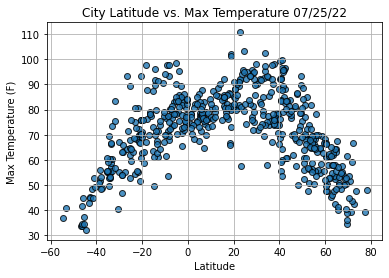

In [63]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperture.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph proerties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid("True")

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

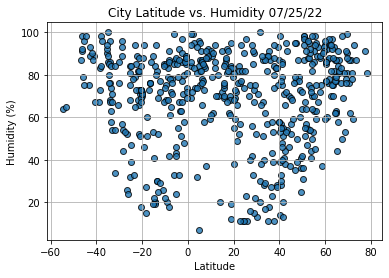

In [69]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

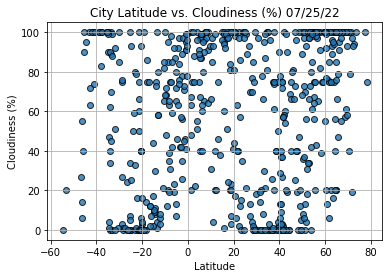

In [70]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

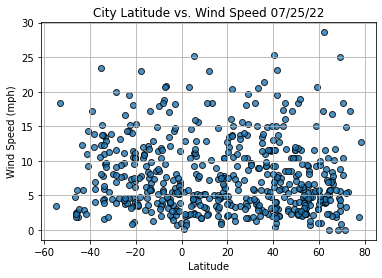

In [71]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()